In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:xlabel='Date'>

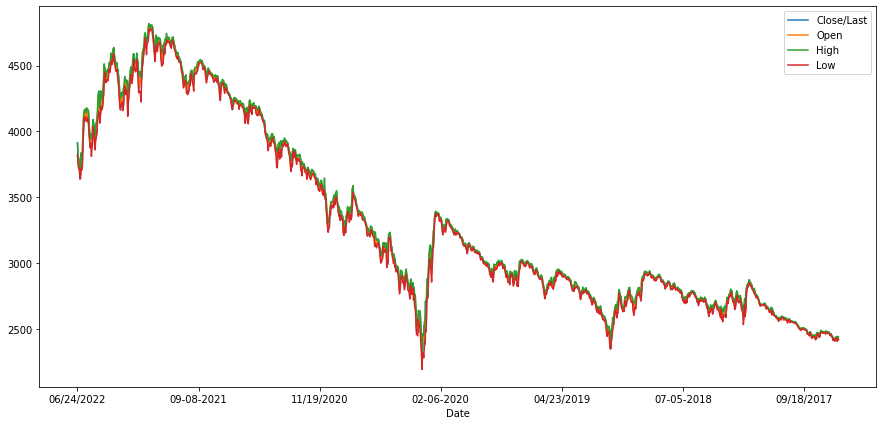

In [9]:
df=pd.read_csv(r'C:\Users\nirma\Desktop\PROJECT\Stock_Price_Prediction\SandP500.csv')
df.head()

# Updating the header
df.head()
df.describe()
df.set_index('Date',inplace=True)

from pylab import rcParams
rcParams['figure.figsize'] = 15, 7
df.plot()

In [10]:
from statsmodels.tsa.stattools import adfuller

In [11]:
test_result=adfuller(df['Close/Last'])

In [13]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

adfuller_test(df['Close/Last'])

ADF Test Statistic : -0.7800791920331436
p-value : 0.824903737226479
#Lags Used : 9
Number of Observations : 1248
weak evidence against null hypothesis,indicating it is non-stationary 


In [14]:
df['Stock First Difference'] = df['Close/Last'] - df['Close/Last'].shift(1)
df['Yearly First Difference']=df['Close/Last']-df['Close/Last'].shift(12)
df.head()

,Close/Last,Volume,Open,High,Low,Stock First Difference,Yearly First Difference
Date,,,,,,,
06/24/2022,3911.74,--,3821.75,3913.65,3821.75,NaN,NaN
06/23/2022,3795.73,--,3774.71,3802.58,3743.52,-116.01,NaN
06/22/2022,3759.89,--,3733.89,3801.79,3717.69,-35.84,NaN
06/21/2022,3764.79,--,3715.31,3779.65,3715.31,4.90,NaN
06/17/2022,3674.84,--,3665.90,3707.71,3636.87,-89.95,NaN


In [16]:
adfuller_test(df['Stock First Difference'].dropna())

ADF Test Statistic : -11.141672015049267
p-value : 3.09718292605169e-20
#Lags Used : 8
Number of Observations : 1248
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<AxesSubplot:xlabel='Date'>

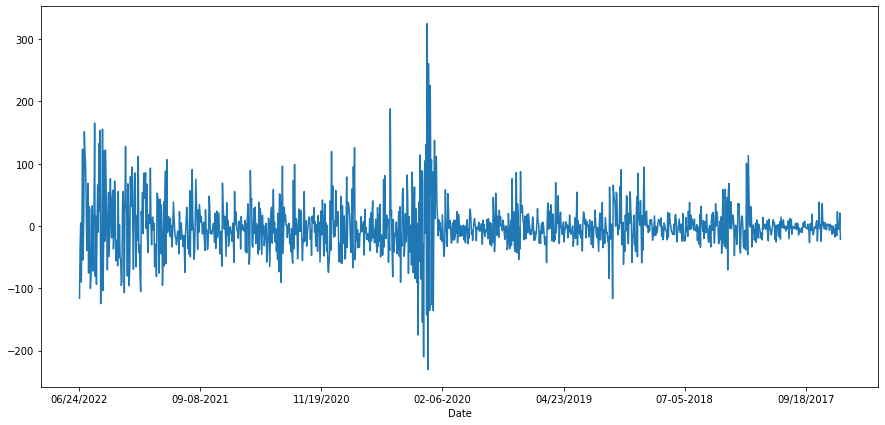

In [17]:
df['Stock First Difference'].plot()

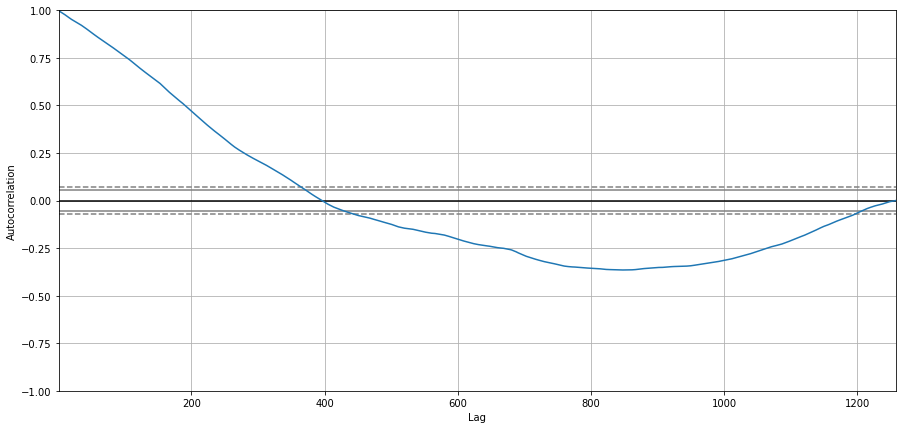

In [18]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Close/Last'])
plt.show()

In [19]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(df['Close/Last'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

C:\Users\nirma\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\nirma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Close/Last   No. Observations:                 1257
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6445.109
Method:                       css-mle   S.D. of innovations             40.790
Date:                Tue, 26 Jul 2022   AIC                          12898.217
Time:                        15:58:48   BIC                          12918.763
Sample:                             1   HQIC                         12905.939
                                                                              
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.1772      1.038     -1.134      0.257      -3.212       0.857
ar.L1.D.Close/Last    -0.4218      0.108     -3.897      0.000      -0.634      -0.210
ma.L1.D.Close/Last     0.2827      0.113      2.508      0.012       0.062       0.504
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.3708           +0.0000j            2.3708            0.5000
MA.1           -3.5374           +0.0000j            3.5374            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='Date'>

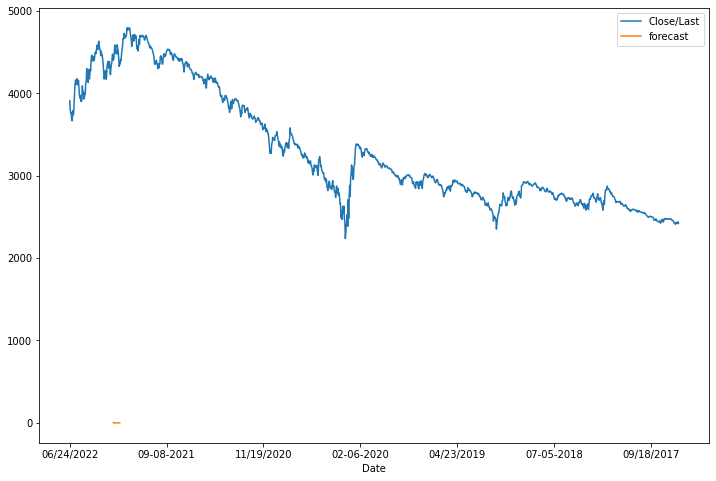

In [20]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Close/Last','forecast']].plot(figsize=(12,8))

C:\Users\nirma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nirma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\nirma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nirma\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

<AxesSubplot:xlabel='Date'>

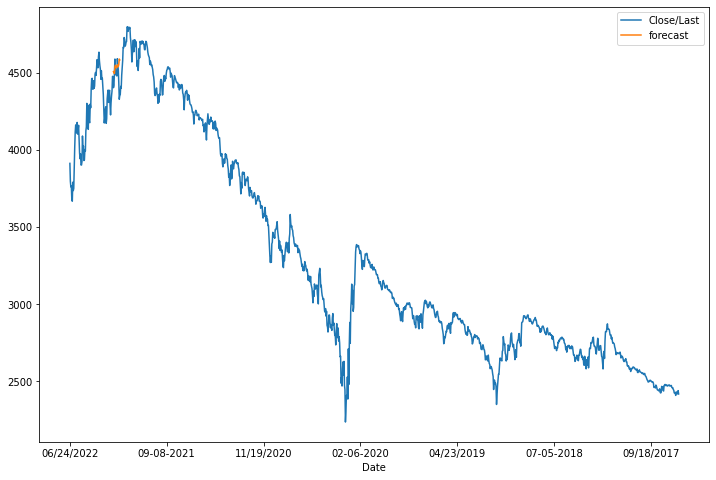